In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
initial_shape = (6, 6)

A = [[42, 7, 2, 4, 7, -3],
     [5, -2, -2, -3, -3, 2],
     [2, -1, 6, -1, 2, -4],
     [4, 5, -1, -6, 2, -2],
     [-2, -4, 3, 1, 3, -2],
     [-1, -18, 8, 2, -2, 7]]

A = np.array(A)

n = 6
I = np.identity(n)
S = I.copy()
fadeev_coefs = [1]
for k in range(1, n+1):
    c_k = - (1 / k) * np.trace(A @ S)
    fadeev_coefs.append(c_k)
    
    S = A @ S + c_k * I

print("Characteristic polynomial coefficients using  Fadeev method:")
print(fadeev_coefs)


Characteristic polynomial coefficients using  Fadeev method:
[1, -50.0, 317.0, -130.0, -24176.0, -46992.0, 307636.0]


In [ ]:
n = 6

b = np.zeros((n, 1))
b[0, 0] = 1

K = b.copy()
v = b.copy()
for i in range(1, n):
    v = A @ v
    K = np.hstack((K, v))

v_n = v.copy()
v_n = A @ v_n

alpha = np.linalg.solve(K, v_n)

krylov_coefs = [1] + [0]*6
krylov_coefs[1] = -alpha[5,0]
krylov_coefs[2] = -alpha[4,0]
krylov_coefs[3] = -alpha[3,0]
krylov_coefs[4] = -alpha[2,0]
krylov_coefs[5] = -alpha[1,0]
krylov_coefs[6] = -alpha[0,0]

print("Characteristic polynomial coefficients using Krylov method:")
print([round(c, 4) for c in krylov_coefs])


Coefficients (alpha_0 to alpha_5):
[-3.07636e+05  4.69920e+04  2.41760e+04  1.30000e+02 -3.17000e+02
  5.00000e+01]
Characteristic polynomial coefficients using Krylov method:
[1, -50.0, 317.0, -130.0, -24176.0, -46992.0, 307636.0]


In [7]:
roots = np.roots(fadeev_coefs)
print("The eigenvalues (roots) are:")
print(roots)


The eigenvalues (roots) are:
[43.01632277+0.j          6.68576065+7.57664196j  6.68576065-7.57664196j
 -4.57940745+2.07509433j -4.57940745-2.07509433j  2.77097083+0.j        ]


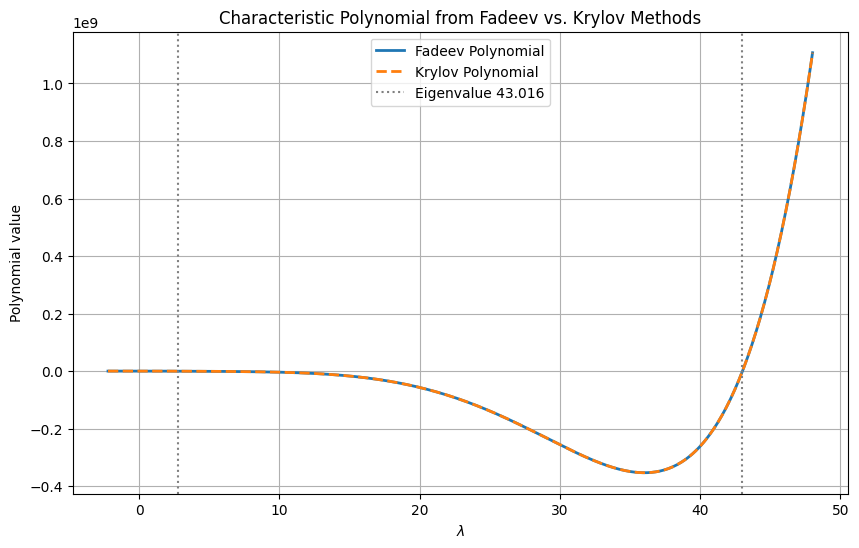

In [ ]:
real_eigs = np.array([43.01632277, 2.77097083])

fadeev_coeffs = np.array([1, -50.0, 317.0, -130.0, -24176.0, -46992.0, 307636.0])

krylov_coeffs = np.array([1, -49.99999999998934, 316.9999999994185, 
                           -129.99999999406268, -24176.00000002347, 
                           -46992.00000019494, 307636.00000047626])


lam_min = np.min(real_eigs) - 5  
lam_max = np.max(real_eigs) + 5 
lambdas = np.linspace(lam_min, lam_max, 500)

fadeev_vals = np.polyval(fadeev_coeffs, lambdas)
krylov_vals = np.polyval(krylov_coeffs, lambdas)

plt.figure(figsize=(10, 6))
plt.plot(lambdas, fadeev_vals, label="Fadeev Polynomial", lw=2)
plt.plot(lambdas, krylov_vals, label="Krylov Polynomial", lw=2, linestyle="--")

for eig in real_eigs:
    plt.axvline(eig, color="gray", linestyle=":", lw=1.5, 
                label=f"Eigenvalue {eig:.3f}" if eig==real_eigs[0] else None)

plt.xlabel(r"$\lambda$")
plt.ylabel("Polynomial value")
plt.title("Characteristic Polynomial from Fadeev vs. Krylov Methods")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
print(f"Eigenvalues with numpy: {np.linalg.eig(A).eigenvalues}")
print(f"Eigenvalues with Fadeev: {np.roots(fadeev_coeffs)}")
print(f"Eigenvalues with Krylov: {np.roots(krylov_coeffs)}")

Eigenvalues with numpy: [43.01632277+0.j          6.68576065+7.57664196j  6.68576065-7.57664196j
  2.77097083+0.j         -4.57940745+2.07509433j -4.57940745-2.07509433j]
Eigenvalues with Fadeev: [43.01632277+0.j          6.68576065+7.57664196j  6.68576065-7.57664196j
 -4.57940745+2.07509433j -4.57940745-2.07509433j  2.77097083+0.j        ]
Eigenvalues with Krylov: [43.01632277+0.j          6.68576065+7.57664196j  6.68576065-7.57664196j
 -4.57940745+2.07509433j -4.57940745-2.07509433j  2.77097083+0.j        ]


In [14]:
np.set_printoptions(precision=4, suppress=True)
A = np.asarray([[6, 2, 0, 0, 0, 0],
     [2, -2, 12, 0, 0, 0],
     [0, 12, 3, -4, 0, 0],
     [0, 0, -4, -6, 2, 0],
     [0, 0, 0, 2, 2, -2],
     [0, 0, 0, 0, -2, 7]])

epsilon = 0.05
max_off_diag = np.inf
step_n = 0

while max_off_diag > epsilon:
    Q, R = np.linalg.qr(A)
    if step_n in [0, 2, 3, 4, 5]:
        print(f"Q matrix on step {step_n}: ")
        print(Q)
        print(f"R matrix on step {step_n}: ") 
        print(R)
    A = R @ Q
    
    off_diag_elements = [abs(A[i, j]) for i in range(1, n) for j in range(0, i)]
    max_off_diag = max(off_diag_elements)
    step_n += 1

print(f"Q matrix on last step: ")
print(Q) 
print(f"R matrix on last step: ")
print(R) 

eigenvalues = [A[i, i] for i in range(n)]

print("Using QR: ")
print(eigenvalues)
print("Using np eigenvalues: ")
print(np.linalg.eig(A).eigenvalues)
print(f"Number of steps was needed: {step_n}")

Q matrix on step 0: 
[[-0.9487  0.0652  0.2929  0.0945  0.0248 -0.0199]
 [-0.3162 -0.1957 -0.8788 -0.2834 -0.0744  0.0596]
 [-0.      0.9785 -0.1953 -0.063  -0.0165  0.0132]
 [-0.      0.      0.3221 -0.8973 -0.2357  0.1886]
 [-0.      0.     -0.      0.3188 -0.74    0.5922]
 [-0.      0.     -0.      0.      0.6248  0.7808]]
R matrix on step 0: 
[[ -6.3246  -1.2649  -3.7947   0.       0.       0.    ]
 [  0.      12.2638   0.5871  -3.914    0.       0.    ]
 [  0.       0.     -12.42    -1.1512   0.6441   0.    ]
 [  0.       0.       0.       6.2734  -1.157   -0.6376]
 [  0.       0.       0.       0.      -3.201    5.8537]
 [  0.       0.       0.       0.       0.       4.2811]]
Q matrix on step 2: 
[[-0.758   0.3768  0.5271  0.0738  0.0139 -0.0015]
 [-0.6523 -0.4379 -0.6126 -0.0857 -0.0161  0.0017]
 [-0.      0.8163 -0.5719 -0.08   -0.015   0.0016]
 [-0.      0.      0.141  -0.9728 -0.1827  0.0193]
 [-0.      0.     -0.      0.1856 -0.9772  0.1033]
 [-0.      0.     -0.      0.   

In [ ]:
A = np.asarray([[6, 2, 0, 0, 0, 0],
     [2, -2, 12, 0, 0, 0],
     [0, 12, 3, -4, 0, 0],
     [0, 0, -4, -6, 2, 0],
     [0, 0, 0, 2, 2, -2],
     [0, 0, 0, 0, -2, 7]])
target_eigenvalues = np.linalg.eig(A).eigenvalues
eigenvalues = [A[i, i] for i in range(n)]
step_n = 0

while step_n == 0 or np.all(np.absolute(eigenvalues - target_eigenvalues) > 0.05):
    Q, R = np.linalg.qr(A)
    A = R @ Q
    eigenvalues = [A[i, i] for i in range(n)]
    step_n += 1


print(f"Number of steps to satisfy condition: {step_n}")
print("Using QR: ")
print(eigenvalues)
print("Using np eigenvalues: ")
print(target_eigenvalues)

Number of steps to satisfy condition: 64


Using QR: 
[13.456750939490576, -12.876108509412076, 7.732275115336673, 1.7762163758811356, -1.8167644611336597, 1.7276305398373273]
Using np eigenvalues: 
[-12.895   -5.9933  13.4756   1.7276   5.9528   7.7323]
